In [ ]:
#importing matplotlib, pandas, numpy for plotting data, load data and to perform operations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# reading Ames Housing dataset
Ames = pd.read_excel("http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls")


In [ ]:
Ames.shape

(2930, 82)

### **Question 1**
plotting univariete continious data

In [ ]:
# list of all continious data columns
continious=['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
            'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
            'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

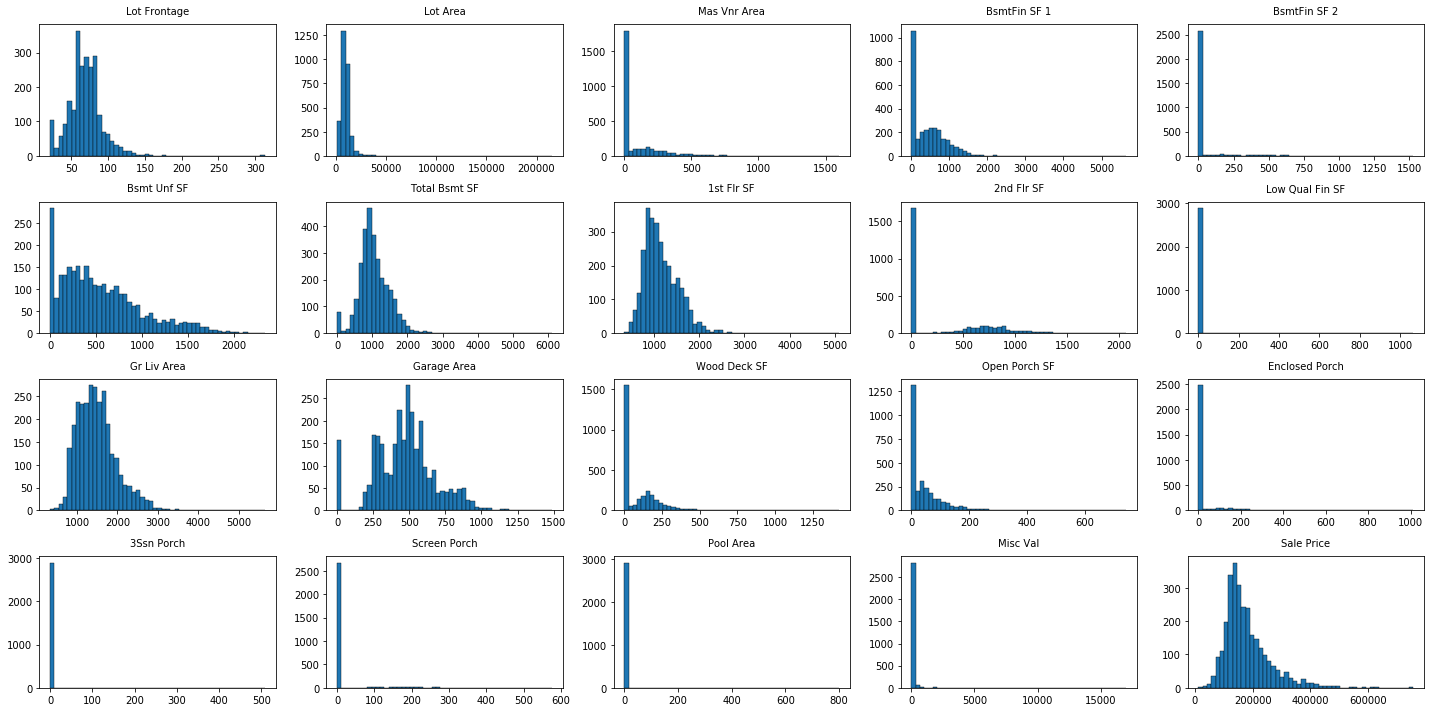

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(20,10))
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(19):
  axs[i].hist(Ames[continious[i]], bins=50, edgecolor='black', linewidth=0.4, label = continious[i])
  axs[i].set_xlabel( continious[i],labelpad=10,fontsize='medium', color= 'black')
  axs[i].xaxis.set_label_position('top')
#fig.delaxes(axs[19])
axs[19].hist(Ames['SalePrice'], bins=50, edgecolor='black', linewidth=0.4, label = 'Sale Price')
axs[19].set_xlabel( 'Sale Price',labelpad=10,fontsize='medium', color= 'black')
axs[19].xaxis.set_label_position('top')
plt.tight_layout()

Here we can see thatr most of the value s are missing in some features wihich needs imputation and scaling too. This shows that most of the features plotted donot have good relationship with target but few have like Garage Area, Bsmt Unf SF

### **Question 2**
plotting continious data against target

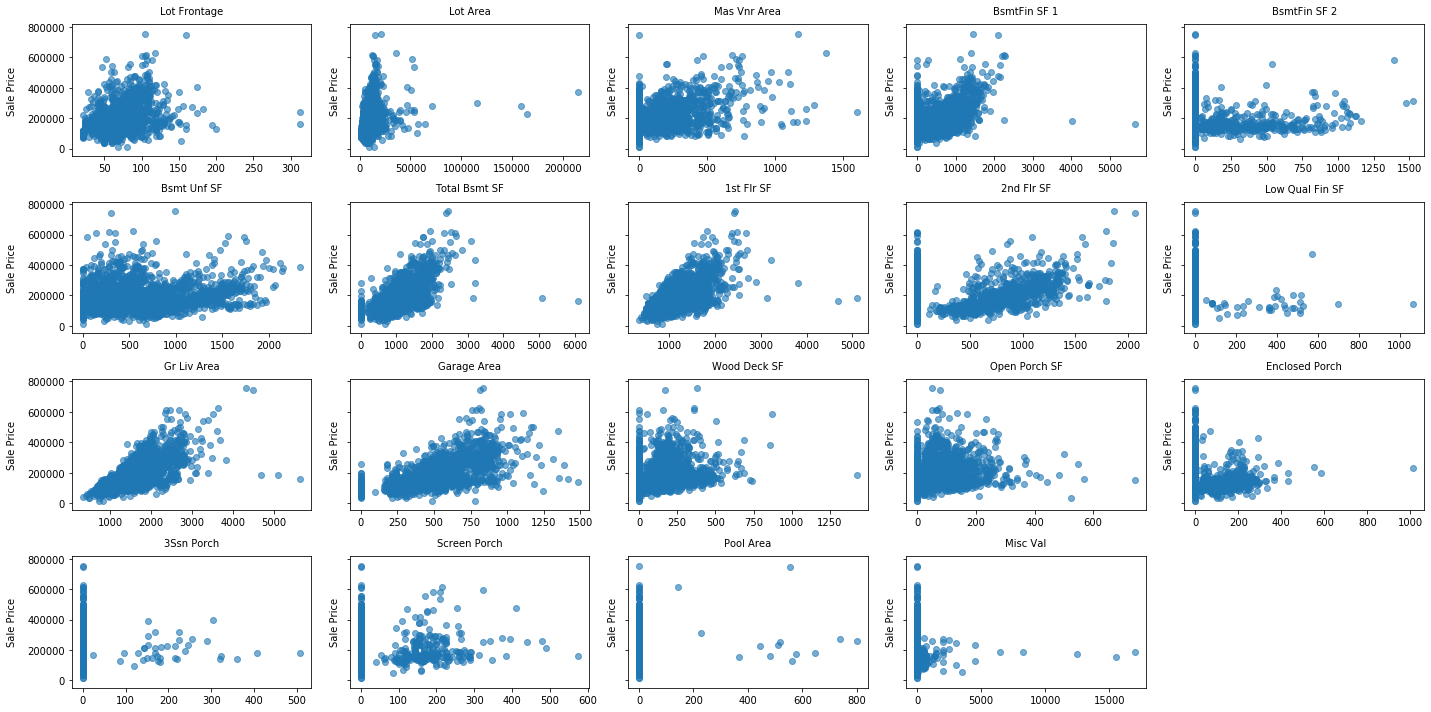

In [ ]:
fig1, axs1 = plt.subplots(4,5, figsize=(20,10), sharey=True)
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs1 = axs1.ravel()

for i in range(19):
  axs1[i].scatter(Ames[continious[i]], Ames['SalePrice'], alpha=0.6)
  axs1[i].set_ylabel( 'Sale Price',labelpad=10,fontsize='medium', color= 'black')
  axs1[i].set_xlabel( continious[i],labelpad=10,fontsize='medium', color= 'black')
  axs1[i].xaxis.set_label_position('top')

fig1.delaxes(axs1[19])
plt.tight_layout()

### **Question 3**
cross validate LR on Catagorical data with one hot encoding

In [ ]:
Ames_target = pd.DataFrame(Ames, columns = ['SalePrice'])
Ames_dataset = Ames.drop(['SalePrice'], axis=1)
Ames_dataset.drop(['Order', 'PID'], axis=1, inplace=True) # dropping index columns

In [ ]:
#Categorical(nominal) column count = 23

Categorical = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
               'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
               'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

from here working on categogorical columns only to get feature importance

In [ ]:
# creating data set of just categorical columns

Cat_data_train = pd.DataFrame(Ames_dataset, columns = Categorical)
Cat_data_target = pd.DataFrame(Ames, columns = ['SalePrice']) # target column copied

In [ ]:
#converting NA values in the data set to any string as NA is a category
# if encoded without converying NA's will be considered null values and ignored

for x in Categorical:
  Cat_data_train[x] = Cat_data_train[x].fillna("N.A")

# MS Subclass has categories in integer data type but it is a nominal column 

# so column data type is converted
Cat_data_train['MS SubClass'] = Cat_data_train['MS SubClass'].apply(str)

In [ ]:
# One-Hot encoding with Pandas 
encoded_train = pd.get_dummies(Cat_data_train)
encoded_target = pd.DataFrame(Ames, columns = ['SalePrice'])

print(encoded_train.shape)
#encoded_train.dtypes
encoded_train.head()

(2930, 191)


,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N.A,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_N.A,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_N.A,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Data is splitted into train and test to apply cross validation to get r2 value

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_train, encoded_target, random_state=1)

#X_train['MS SubClass'].head()

In [ ]:
#importing libraries to cross validate and aapply linear regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#temp=X_train.iloc[:,0:15]
#scores = cross_val_score( LinearRegression(), X_train.iloc[:,25:27], y_train, cv=10, scoring='r2')
#np.mean(scores)

In [ ]:
#calculating r2 value of each feature
print('R2 value :')
maxscore=0
for x in Categorical:
  #to get all encoded columns names of original feature
  combined_col = [col for col in X_train if col.startswith(x)] 
  scores = cross_val_score( LinearRegression(), X_train[combined_col], y_train, cv=10, scoring='r2')
  Mean_Scores = np.mean(scores)
  if(Mean_Scores > maxscore):
    maxscore=Mean_Scores
print(maxscore)

R2 value :
0.27578906767101047


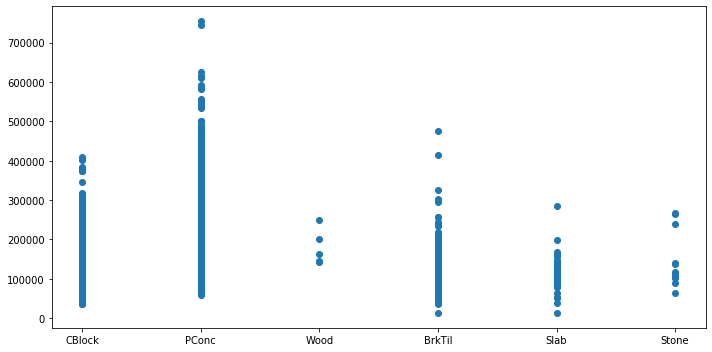

In [ ]:
#Plotting feature with max r2 value 
fig2, axs2 = plt.subplots(1,1, figsize=(10,5))
axs2.scatter(Cat_data_train['Foundation'], Cat_data_target)
plt.tight_layout()

#This relation below between categorical Foundation feature and target value
#shows Pound Concrete category is more important feature and effective 

This relation below between categorical Foundation feature and target value shows Pound Concrete category is more important feature and effective 

### **Question 4**
Using Columntransformer to apply different encoding on different columns and apply Linear regression, Lasso, Ridge, Elasticnet with and without standard scalar

In [ ]:
New_Ames = Ames.copy()

#Converting ordinal data which are in int type to object

New_Ames['MS SubClass'] = New_Ames['MS SubClass'].astype(object)
New_Ames['MS Zoning'] = New_Ames['MS Zoning'].astype(object)
New_Ames['Overall Cond'] = New_Ames['Overall Cond'].astype(object)
New_Ames['Overall Qual'] = New_Ames['Overall Qual'].astype(object)

#converting discrete data to object type

New_Ames['Garage Yr Blt'] = New_Ames['Garage Yr Blt'].astype(object)
New_Ames['Garage Cars'] = New_Ames['Garage Cars'].astype(object)
New_Ames['Year Built'] = New_Ames['Year Built'].astype(object)
New_Ames['Year Remod/Add'] = New_Ames['Year Remod/Add'].astype(object)
New_Ames['Bsmt Full Bath'] = New_Ames['Bsmt Full Bath'].astype(object)
New_Ames['Bsmt Half Bath'] = New_Ames['Bsmt Half Bath'].astype(object)
New_Ames['Full Bath'] = New_Ames['Full Bath'].astype(object)
New_Ames['Half Bath'] = New_Ames['Half Bath'].astype(object)
New_Ames['Bedroom AbvGr'] = New_Ames['Bedroom AbvGr'].astype(object)
New_Ames['Kitchen AbvGr'] = New_Ames['Kitchen AbvGr'].astype(object)
New_Ames['TotRms AbvGrd'] = New_Ames['TotRms AbvGrd'].astype(object)
New_Ames['Fireplaces'] = New_Ames['Fireplaces'].astype(object)
New_Ames['Mo Sold'] = New_Ames['Mo Sold'].astype(object)
New_Ames['Yr Sold'] = New_Ames['Yr Sold'].astype(object)

#dropping index and ID columns

New_Ames.drop(['Order', 'PID'], axis=1, inplace=True)

#dropping single row of missing value in Electrical column

New_Ames=New_Ames.dropna(subset=['Electrical'])

#dividing data set into target and train values
Ames_target = pd.DataFrame(New_Ames, columns = ['SalePrice'])
Ames_train = New_Ames.drop(['SalePrice'], axis=1)


In [ ]:
#converting NA's to N.A as category in features having NA as category
Ames_train['Alley'] = Ames_train['Alley'].fillna('NG')

for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    Ames_train[col] = Ames_train[col].fillna('NG')

for col in ('Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'):
    Ames_train[col] = Ames_train[col].fillna('NG')

Ames_train['Pool QC'] = Ames_train['Pool QC'].fillna('NG')
Ames_train['Misc Feature'] = Ames_train['Misc Feature'].fillna('NG')
Ames_train['Fence'] = Ames_train['Fence'].fillna('NG')
Ames_train['Fireplace Qu'] = Ames_train['Fireplace Qu'].fillna('NG')
Ames_train['Mas Vnr Type'] = Ames_train['Mas Vnr Type'].fillna('NG')

In [ ]:
#for x in Ames_train.columns:
#  print(x,' : ',Ames_train[x].isna().sum())

#List of rest of features which needs to be imputed in both type continious and categorical

continious_features = ['Lot Frontage', 'Mas Vnr Area', 'Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF']
categorical_features = ['Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [ ]:
#splitting the data set into train and test with sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Ames_train, Ames_target, random_state=1)

In [ ]:
# importing models to impute data, encode data using pipeline and column transformer to find r2 value with crossvalscore
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#creating pipeline to impute only missing continous data columns with KNNImputer
numerical_pipeline = make_pipeline(KNNImputer())

imputer= KNNImputer()

#fitting and transforming both missing columns
X_train[continious_features]= imputer.fit_transform(X_train[continious_features])
X_train[categorical_features]= imputer.fit_transform(X_train[categorical_features])

#creating list of all contnious and categorical type columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
#Note:the above created list contains all columns of data sets 
#but imputed columns in continious and categorical are named features not columns to differentiate

**Evaluating Linear Regression with and without Scaling**

In [ ]:
# using pipeline and columntransformer to cross validate data by applying one hot encoding without scaling
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),categorical_columns), remainder='passthrough')
column_trans.fit_transform(X_train)

# creating pipe having columntransformer to convert data then apply linear regression on it
pipe = make_pipeline(column_trans, LinearRegression())

# evaluating the cross val score to get r2 value
score=cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
print('Linear Regression : ',np.mean(score))

Linear Regression :  0.8240379676342631


In [ ]:
#same operations on LR but with Scaling data
column_trans1 = make_column_transformer((StandardScaler(), numeric_columns ),(OneHotEncoder(handle_unknown='ignore'),categorical_columns), remainder='passthrough')
column_trans1.fit_transform(X_train)
pipe1 = make_pipeline(column_trans1, LinearRegression())
score1=cross_val_score(pipe1, X_train, y_train, cv=10, scoring='r2')
print('Linear Regression with Scaling : ',np.mean(score1))

Linear Regression with Scaling :  0.8217204456594087


R2 value on Linear Regression model does not change even after scaling is applied

**Evaluating Ridge Regression with and without Scaling**

In [ ]:
from sklearn.linear_model import Ridge
pipe = make_pipeline(column_trans, Ridge())
score=cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
print('Ridge Regression : ',np.mean(score))

Ridge Regression :  0.7172141741807878


In [ ]:
column_trans1 = make_column_transformer((StandardScaler(), numeric_columns ),(OneHotEncoder(handle_unknown='ignore'),categorical_columns), remainder='passthrough')
column_trans1.fit_transform(X_train)
pipe1 = make_pipeline(column_trans1, Ridge())
score1=cross_val_score(pipe1, X_train, y_train, cv=10, scoring='r2')
print('Ridge Regression with Scaling : ',np.mean(score1))

Ridge Regression with Scaling :  0.850995275912265


As we can see r2 value after scaling on ridge regression increases

**Evaluating Lasso Regression with and without scaling**

In [ ]:
from sklearn.linear_model import Lasso
pipe = make_pipeline(column_trans, Lasso())
score=cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
print('Lasso Regression: ',np.mean(score))

Lasso Regression:  0.8439485552832702


In [ ]:
column_trans1 = make_column_transformer((StandardScaler(), numeric_columns ),(OneHotEncoder(handle_unknown='ignore'),categorical_columns), remainder='passthrough')
column_trans1.fit_transform(X_train)
pipe1 = make_pipeline(column_trans1, Lasso())
score1=cross_val_score(pipe1, X_train, y_train, cv=10, scoring='r2')
print('Lasso Regression with scaling: ',np.mean(score1))

Lasso Regression with scaling:  0.8439817002638849


R2 value on Lasso Model does not change even after applying scaling on data set

**Evaluating ElasticNet with and without Scaling**

In [ ]:
from sklearn.linear_model import ElasticNet
pipe = make_pipeline(column_trans, ElasticNet())
score=cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
print('ElasticNet: ',np.mean(score))

ElasticNet:  0.7970000462877587


In [ ]:
column_trans1 = make_column_transformer((StandardScaler(), numeric_columns ),(OneHotEncoder(handle_unknown='ignore'),categorical_columns), remainder='passthrough')
column_trans1.fit_transform(X_train)
pipe1 = make_pipeline(column_trans1, ElasticNet())
score1=cross_val_score(pipe1, X_train, y_train, cv=10, scoring='r2')
print('ElasticNet with Scaling: ',np.mean(score1))

ElasticNet with Scaling:  0.8129745075958636


Here the R2 value of ElasticNet increases but very little with the help of scaling

### **Question 5**
Tuning the parameters of the models using grid search and visualizing the dependency of the validation score on each model

In [ ]:
# creating  encoder and scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

#applying scaler on target variable 
y1  = pd.DataFrame(scaler.fit_transform(Ames_target))
'''for x in filtered_data.columns:
  print(x,' : ',filtered_data[x].isna().sum())'''
#imputing data
imputer= KNNImputer()
Ames_train[continious_features]= imputer.fit_transform(Ames_train[continious_features])
Ames_train[categorical_features]= imputer.fit_transform(Ames_train[categorical_features])
#print(Ames_train.shape)

# Scaling continous data and Encoding categorical data
scaled_columns  = scaler.fit_transform(Ames_train[numeric_columns]) 
encoded_columns = ohe.fit_transform(Ames_train[categorical_columns])

# Concatenate Processed Columns as X1 to perform split
X1 = pd.DataFrame(np.concatenate([scaled_columns, encoded_columns], axis=1))

In [ ]:
#performing train test split on new processed data to perform gridsearchcv
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)

In [ ]:
#importing ridge model and gridsearchcv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#giving the parameter range
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X1_train, y1_train)
alpha = np.logspace(-3, 3, 13)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 10.0}
0.8639148259882299


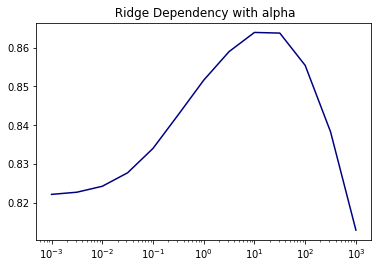

In [ ]:
#visualizing the dependency of validation score on alpha
train_scores_mean = grid.cv_results_["mean_test_score"]
plt.semilogx(alpha, train_scores_mean, label='Mean Train score', color='navy')
plt.title(label=' Ridge Dependency with alpha')
plt.show()

In [ ]:
#find gridsearchcv score with Lasso model
from sklearn.linear_model import Lasso
param_grid = {'alpha': np.logspace(-5, -3, 13)}
#print(param_grid)
grid = GridSearchCV(Lasso(normalize=True), param_grid, cv=10)
grid.fit(X1_train, y1_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.00021544346900318823}
0.8723140389943183


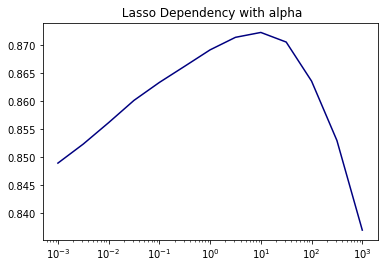

In [ ]:
#visualizing the dependency of validation score on alpha
train_scores_mean = grid.cv_results_["mean_test_score"]
plt.semilogx(alpha, train_scores_mean, label='Mean Train score', color='navy')
plt.title(label=' Lasso Dependency with alpha')
plt.show()

In [ ]:
#finding gridsearchcv score with ElasticNet model
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10)}
alpha = np.logspace(-4, -1, 10)
grid = GridSearchCV(ElasticNet(l1_ratio= 0.5), param_grid, cv=10)
grid.fit(X1_train, y1_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.002154434690031882}
0.8710105764432814


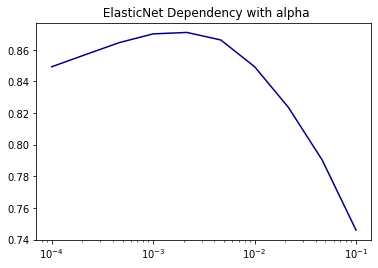

In [ ]:
#visualizing the dependency of validation score on alpha
train_scores_mean = grid.cv_results_["mean_test_score"]
plt.semilogx(alpha, train_scores_mean, label='Mean Train score', color='navy')
plt.title(label=' ElasticNet Dependency with alpha')
plt.show()

### **Question 6**
Visualizing coefficients of resulting models

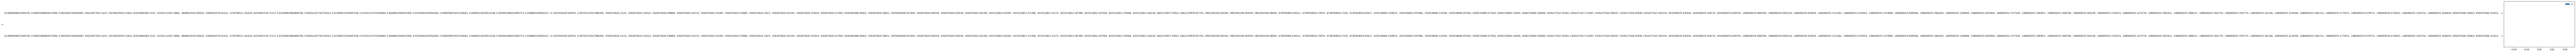

In [ ]:
top_n =10
cols=X1_train.columns
model=LinearRegression()
model.fit(X1_train, y1_train)
#coef= model.coef_
zipped = list(zip(cols,model.coef_))
zipped.sort(key=lambda x: x[1], reverse = True)
t=pd.DataFrame(zipped)
top_10=t.head(top_n)
bottom_10 = t.tail(top_n)
pd.concat([top_10,bottom_10], axis=0).plot.barh(x=1, y=0)
#plt.plot(pd.concat([top_10,bottom_10]))